In [153]:
import numpy as np
import pandas as pd

import os
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict


In [4]:
data_path = './dataset'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_data = pd.read_csv(os.path.join(data_path, '/content/drive/MyDrive/Titanicdata/train.csv'))
test_data = pd.read_csv(os.path.join(data_path, '/content/drive/MyDrive/Titanicdata/test.csv'))

In [7]:
test_data["Survived"] = -999

In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-999
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,-999
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-999
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-999
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-999


In [10]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
data = pd.concat((train_data,test_data), axis=0) 

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,-999,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,-999,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,-999,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,-999,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,-999,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [14]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,-318.747135,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,466.107167,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,-999.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,-999.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


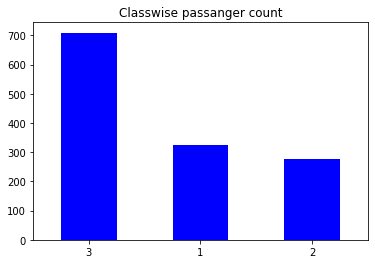

In [15]:
data.Pclass.value_counts().plot(kind='bar', rot=0, title='Classwise passanger count', color='b');

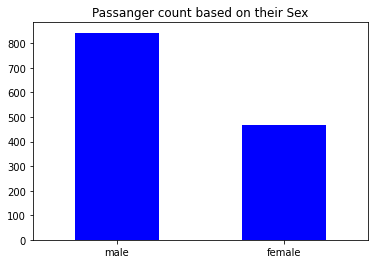

In [16]:
data.Sex.value_counts().plot(kind='bar', rot=0, title='Passanger count based on their Sex', color='b');

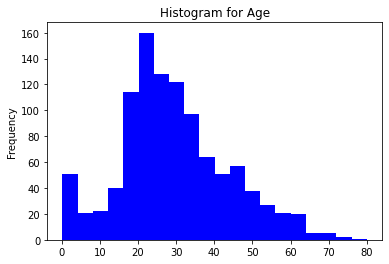

In [17]:
data.Age.plot(kind='hist', title='Histogram for Age', color='b', bins=20);

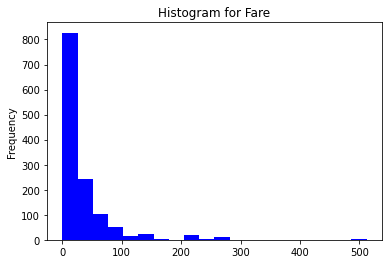

In [18]:
data.Fare.plot(kind='hist', title='Histogram for Fare', color='b', bins=20);

In [21]:
data[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [22]:
total = train_data.isnull().sum().sort_values(ascending=False)

In [23]:
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

In [24]:
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [43]:
train_data.columns.values

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'relatives', 'not_alone', 'Deck'],
      dtype=object)

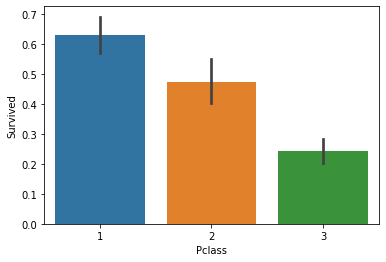

In [28]:
sns.barplot(x='Pclass', y='Survived', data=train_data)

In [31]:
data = [train_data, test_data]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_data['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


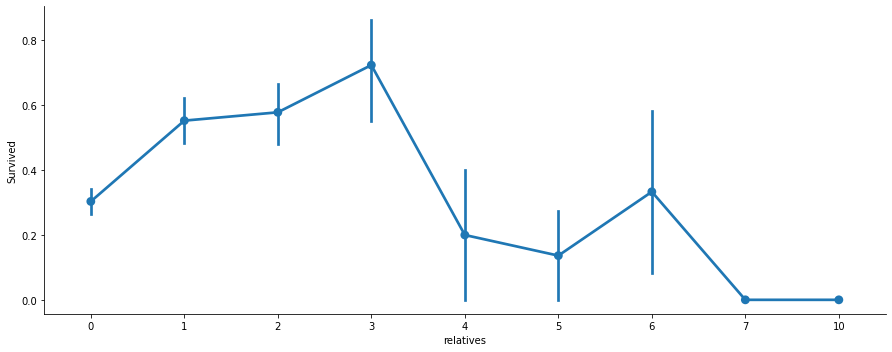

In [44]:
axes = sns.factorplot('relatives','Survived', data=train_data, aspect = 2.5, )

In [33]:
train_data = train_data.drop(['PassengerId'], axis=1)

In [41]:
data = [train_data, test_data]

for dataset in data:
    mean = train_data["Age"].mean()
    std = test_data["Age"].std()
    
    is_null = dataset["Age"].isnull().sum()
    
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    
    dataset["Age"] = train_data["Age"].astype(int)
    
train_data["Age"].isnull().sum()

0

In [46]:
train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [47]:
common_value = 'S'
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
 12  Deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [49]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [50]:
data = [train_data, test_data]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [51]:
genders = {"male": 0, "female": 1}
data = [train_data, test_data]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [52]:
train_data['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [53]:
train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

In [54]:
train_data.columns.values

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'relatives', 'not_alone', 'Deck'], dtype=object)

In [55]:
data = [train_data, test_data]

for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6


In [56]:
data = [train_data, test_data]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [57]:
data = [train_data, test_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

In [58]:
data = [train_data, test_data]

for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [59]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [61]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,6,0,0,1,2,0,1,8,1,18,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


In [62]:
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

In [63]:
X_train = train_data.drop("Survived", axis=1)

Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()

# feels like Parch feature doesn't have any impact 
X_test = X_test.drop("Parch", axis=1)
Y_test = X_test["Survived"]


In [64]:
Y_train.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [84]:
support_vector_machine = svm.SVC(probability=True)

In [85]:
support_vector_machine.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [86]:
Y_pred = support_vector_machine.predict(X_test)

In [87]:
accuracy_svm = round(support_vector_machine.score(X_train, Y_train) * 100, 2)

In [88]:
print ("Accuracy : ", accuracy_svm)

Accuracy :  82.49


In [89]:
c_matrix = confusion_matrix(Y_test, pd.DataFrame(Y_pred))

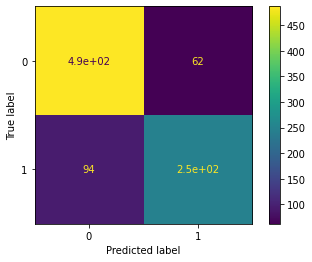

In [91]:
plot_confusion_matrix(support_vector_machine, X_train, Y_train)
plt.show()

In [92]:
y_scores = support_vector_machine.predict_proba(X_train)
y_scores = y_scores[:,1]

In [94]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

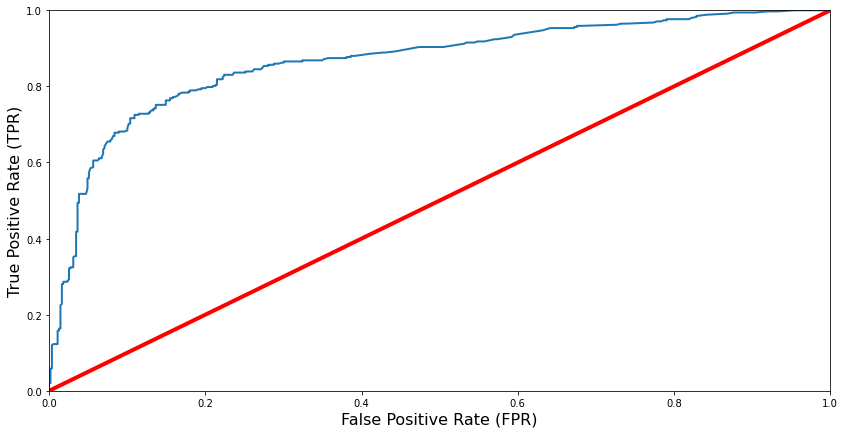

In [95]:
plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [96]:
predictions = cross_val_predict(support_vector_machine, X_train, Y_train, cv=3)

In [97]:
#f1 score
print("F1 score", f1_score(Y_train, predictions))

F1 score 0.7449768160741885


### Decision Tree

In [112]:
decision_tree = DecisionTreeClassifier() 

In [113]:
decision_tree.fit(X_train, Y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [114]:
Y_pred = decision_tree.predict(X_test)

In [115]:
accuracy_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [116]:
print ("Accuracy : ", accuracy_decision_tree)

Accuracy :  92.48


In [117]:
c_matrix = confusion_matrix(Y_test, pd.DataFrame(Y_pred))

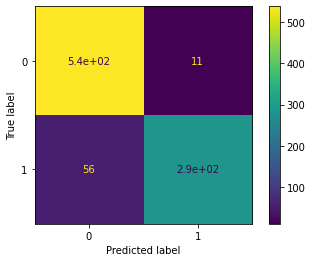

In [118]:
# plotting the confusion matrix
plot_confusion_matrix(decision_tree, X_train, Y_train)
plt.show()

#### ROC Curve

In [119]:
y_scores = decision_tree.predict_proba(X_train)
y_scores = y_scores[:,1]

In [120]:
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

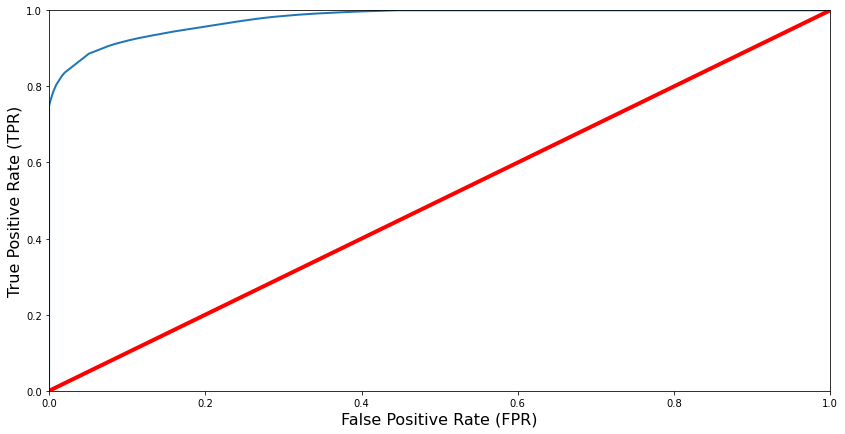

In [121]:
plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [122]:
predictions = cross_val_predict(decision_tree, X_train, Y_train, cv=3)

In [123]:
#f1 score
print("F1 score", f1_score(Y_train, predictions))

F1 score 0.7019230769230769


In [124]:
random_forest = RandomForestClassifier(n_estimators=100)

In [125]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [126]:
Y_prediction = random_forest.predict(X_test)

In [127]:
random_forest.score(X_train, Y_train)

0.9248035914702581

In [128]:
accuracy_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [129]:
print ("Accuracy : ", accuracy_random_forest)

Accuracy :  92.48


In [130]:
c_matrix = confusion_matrix(Y_test, pd.DataFrame(Y_pred))

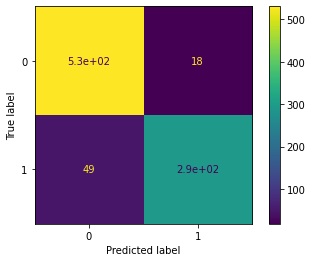

In [131]:
# plotting the confusion matrix
plot_confusion_matrix(random_forest, X_train, Y_train)
plt.show()

In [132]:
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

In [133]:
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

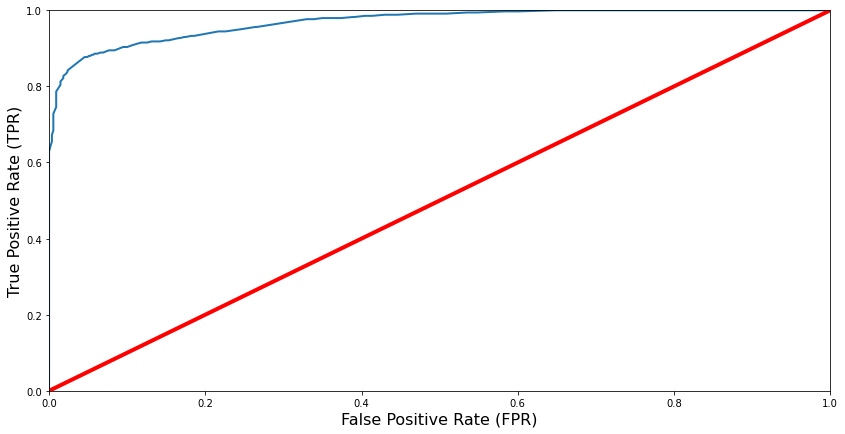

In [134]:
plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [135]:
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)

In [136]:
#f1 score
print("F1 score", f1_score(Y_train, predictions))

F1 score 0.7718223583460949


In [142]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 
              'Decision Tree', 'Random Forest'],
    'Score': [accuracy_svm, 
              accuracy_decision_tree, accuracy_random_forest]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.48,Decision Tree
92.48,Random Forest
82.49,Support Vector Machines


In [145]:
# Support Vector machine
svm_y_scores = support_vector_machine.predict_proba(X_train)
svm_y_scores = svm_y_scores[:,1]

In [146]:
SVM_fpr, SVM_tpr, SVM_threshold = roc_curve(Y_train, svm_y_scores)
auc_SVM = auc(SVM_fpr, SVM_tpr)

In [147]:
# Decesion Tree
dt_y_scores = decision_tree.predict_proba(X_train)
dt_y_scores = dt_y_scores[:,1]

In [148]:
DT_fpr, DT_tpr, DT_threshold = roc_curve(Y_train, dt_y_scores)
auc_DT = auc(DT_fpr, DT_tpr)

In [149]:
# Random Forest
rf_y_scores = random_forest.predict_proba(X_train)
rf_y_scores = rf_y_scores[:,1]

In [150]:
RF_fpr, RF_tpr, RF_threshold = roc_curve(Y_train, rf_y_scores)
auc_RF = auc(RF_fpr, RF_tpr)

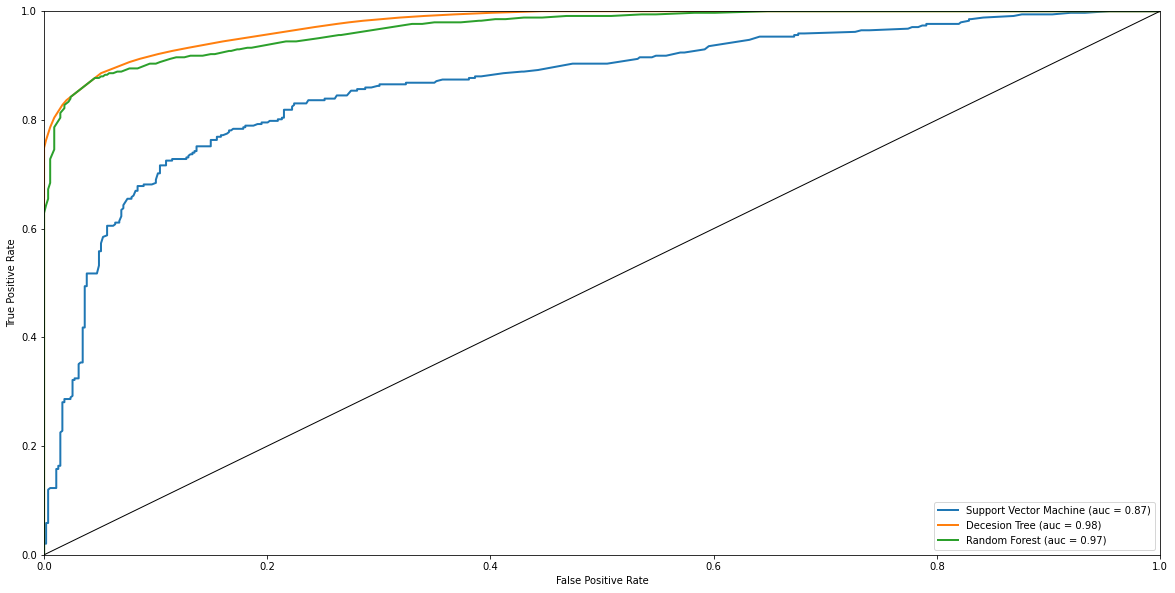

In [152]:
plt.figure(figsize =(20,10))
plt.plot(SVM_fpr, SVM_tpr, linewidth=2, linestyle='solid', label = "Support Vector Machine (auc = %0.2f)" % auc_SVM)
plt.plot(DT_fpr, DT_tpr, linewidth=2, linestyle='solid', label = "Decesion Tree (auc = %0.2f)" % auc_DT)
plt.plot(RF_fpr, RF_tpr, linewidth=2, linestyle='solid', label = "Random Forest (auc = %0.2f)" % auc_RF)

plt.plot([0, 1], [0, 1], 'k', linewidth=1)
plt.axis([0, 1, 0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()